In [1]:
import os
import sys
import glob
import random
import pickle
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.utils.data
import torchvision.models as models
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Add the src directory for functions
src_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'src')
print(src_dir)
sys.path.append(src_dir)

# import my functions:
from WSI_utils import*

base_out_dir = '/media/rene/Data/camelyon_out'

/media/rene/Data/camelyon/src


In [6]:
wsi_path = '/media/rene/Data/CAMELYON16/TrainingData/Train_Normal/Normal_001.tif'
wsi = WSI(wsi_path)

NameError: name 'WSI' is not defined

In [4]:
wsi.generate_mask(mask_level=8, disk_radius=False)

In [5]:
print(wsi.mask.shape)
print(np.prod(wsi.mask.shape))
print(np.sum(wsi.mask))

print('wsi.wsi.level_downsamples', wsi.wsi.level_downsamples[8])

(1024, 512)
524288
21105
wsi.wsi.level_downsamples 203.5


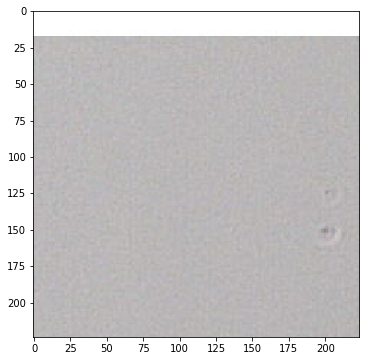

In [6]:
img = wsi.wsi.read_region(location=(9, 2), level=0, size=(224, 224)).convert('RGB')
plt.figure(figsize=(6, 6))
plt.imshow(img)

# Debug

In [7]:
model_loc = '/media/rene/Data/camelyon_out/trained_models/inception_100t.pth'
model = models.inception_v3(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

model.load_state_dict(torch.load(model_loc))
model.cuda()
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True)
  )
  (Mixed_5b): InceptionA(
    (branch1x1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1,

In [8]:
heatmap = wsi.make_heatmap_simple(model, batch_size=16, tile_sample_level=0, patch_size=299)

  0%|          | 0/1320 [00:00<?, ?it/s]

len(all_indices[0]) 21105
heatmap.shape (1024, 512, 2)
num_batches 1320


100%|██████████| 1320/1320 [02:26<00:00,  8.99it/s]

index 21105 is out of bounds for axis 0 with size 21105
index 21106 is out of bounds for axis 0 with size 21105
index 21107 is out of bounds for axis 0 with size 21105
index 21108 is out of bounds for axis 0 with size 21105
index 21109 is out of bounds for axis 0 with size 21105
index 21110 is out of bounds for axis 0 with size 21105
index 21111 is out of bounds for axis 0 with size 21105
index 21112 is out of bounds for axis 0 with size 21105
index 21113 is out of bounds for axis 0 with size 21105
index 21114 is out of bounds for axis 0 with size 21105
index 21115 is out of bounds for axis 0 with size 21105
index 21116 is out of bounds for axis 0 with size 21105
index 21117 is out of bounds for axis 0 with size 21105
index 21118 is out of bounds for axis 0 with size 21105
index 21119 is out of bounds for axis 0 with size 21105


# Debug the heatmap issues

(1024, 512, 2)
36.99323749542236


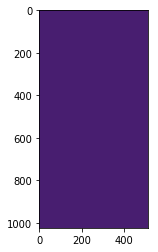

In [2]:
PATH = '/media/rene/Data/camelyon_out/heatmaps/inception_v3_r1/train/'

heatmap_loc = PATH+'normal100heatmap.npy'
heatmap = np.load(heatmap_loc)
print(heatmap.shape)
plt.figure(figsize=(8, 8))
plt.imshow(heatmap[:, :, 0])
print(np.sum(heatmap[:, :, 1]))

In [2]:
loc = '/media/rene/Data/CAMELYON16/TrainingData/Train_Tumor/Tumor_001.tif'
mask_loc = '/media/rene/Data/CAMELYON16/TrainingData/Ground_Truth/Mask/Tumor_001_Mask.tif'
model_loc = '/media/rene/Data/camelyon_out/trained_models/inception_100t.pth'


model = models.inception_v3(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# load the model
model.load_state_dict(torch.load(model_loc))
model.eval()
model.cuda()

wsi = WSI(loc)
wsi_mask = WSI(mask_loc)

In [3]:
heatmap = wsi.make_heatmap(model, batch_size=16, tile_sample_level=0, patch_size=299, stride = 299)

self.mask.shape (3584, 1536)
heatmap.shape (739, 327, 2)


  0%|          | 0/76376 [00:00<?, ?it/s]

76376


100%|██████████| 76376/76376 [28:43<00:00, 44.32it/s]


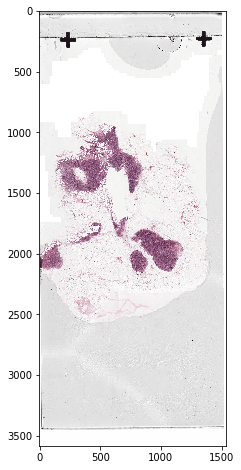

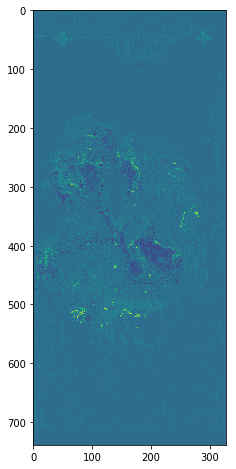

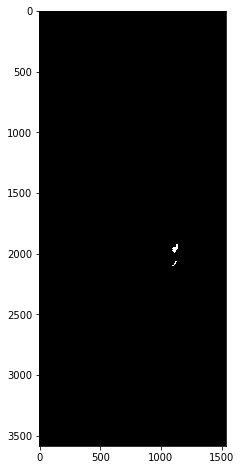

In [5]:
img = wsi.wsi.read_region(location=(0, 0), level=6, size=wsi.wsi.level_dimensions[6]).convert('RGB')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.figure(figsize=(8, 8))
plt.imshow(heatmap[:, :, 1])

mask = wsi_mask.wsi.read_region(location=(0, 0), level=6, size=wsi.wsi.level_dimensions[6]).convert('RGB')
plt.figure(figsize=(8, 8))
plt.imshow(mask)

In [4]:
heatmap = wsi.make_heatmap(model, batch_size=16, tile_sample_level=0, patch_size=299, stride = 299)

  0%|          | 0/76376 [00:00<?, ?it/s]

self.mask.shape (3584, 1536)
heatmap.shape (739, 327, 2)


100%|██████████| 76376/76376 [14:53<00:00, 85.51it/s]


In [5]:
print(heatmap.sum())

2446353.175808482


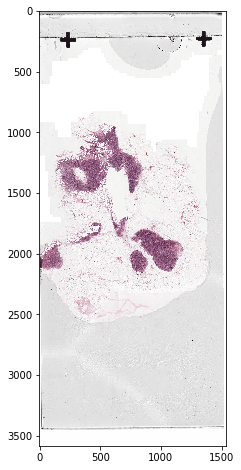

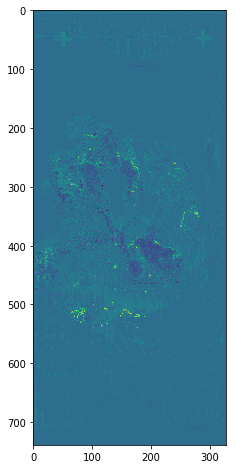

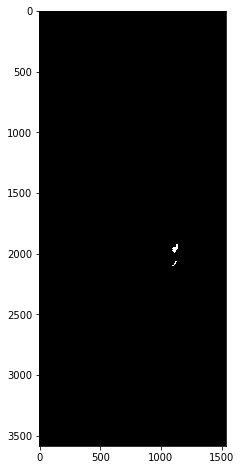

In [6]:
img = wsi.wsi.read_region(location=(0, 0), level=6, size=wsi.wsi.level_dimensions[6]).convert('RGB')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.figure(figsize=(8, 8))
plt.imshow(heatmap[:, :, 1])

mask = wsi_mask.wsi.read_region(location=(0, 0), level=6, size=wsi.wsi.level_dimensions[6]).convert('RGB')
plt.figure(figsize=(8, 8))
plt.imshow(mask)